In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [90]:
basetable = pd.read_csv('../../Data/Gold/basetable.csv')

In [91]:
basetable.columns

Index(['datum', 'niveau', 'schepcorner_id', 'ploegnaam', 'ervaring_schepper',
       'ervaring_kopper', 'ervaring_duo', 'is_thuisploeg', 'kwart',
       'is_schepper_bank', 'is_kopper_bank', 'schepper_pos_rechts', 'positie',
       'kop_verplaatsen_achter', 'kop_veel_verplaatsen', 'kop_hor_verplaatsen',
       'goal', 'klassement_thuis', 'klassement_uit', 'uitslag_thuis',
       'uitslag_uit', 'score_voor_thuis', 'score_voor_uit', 'klassement',
       'klassement_veschil', 'is_degradatieplaats', 'is_promotieplaats',
       'score_verschil_voor', 'periode', 'schepcorner_nummer',
       'goal_lag_ploeg', 'goal_lag_wedstrijd', 'positie_verticaal_voor',
       'positie_horizontaal'],
      dtype='object')

In [92]:
cols_to_drop = ["datum", "schepcorner_id", "ploegnaam", "klassement_thuis","klassement_uit", "uitslag_uit", "uitslag_thuis", "positie"] 
basetable.drop(columns=cols_to_drop, inplace=True)

In [93]:
basetable.isnull().sum()

niveau                      0
ervaring_schepper           0
ervaring_kopper             0
ervaring_duo                0
is_thuisploeg               0
kwart                       0
is_schepper_bank            0
is_kopper_bank              0
schepper_pos_rechts         0
kop_verplaatsen_achter      0
kop_veel_verplaatsen        0
kop_hor_verplaatsen         0
goal                        0
score_voor_thuis            0
score_voor_uit              0
klassement                253
klassement_veschil        253
is_degradatieplaats         0
is_promotieplaats           0
score_verschil_voor         0
periode                     0
schepcorner_nummer          0
goal_lag_ploeg              0
goal_lag_wedstrijd          0
positie_verticaal_voor      0
positie_horizontaal         0
dtype: int64

In [94]:
### voorlopig
basetable["klassement"] = basetable["klassement"].fillna(7)
basetable["klassement_veschil"] = basetable["klassement_veschil"].fillna(6)


In [95]:
basetable.head()

,niveau,ervaring_schepper,ervaring_kopper,ervaring_duo,is_thuisploeg,kwart,is_schepper_bank,is_kopper_bank,schepper_pos_rechts,kop_verplaatsen_achter,...,klassement_veschil,is_degradatieplaats,is_promotieplaats,score_verschil_voor,periode,schepcorner_nummer,goal_lag_ploeg,goal_lag_wedstrijd,positie_verticaal_voor,positie_horizontaal
0,kern_laag,4.0,4.0,4.0,1,1,1,0,1,0,...,4.0,0,1,0,4,1,0.000000,0.661692,0,midden
1,kern_laag,4.0,4.0,4.0,1,2,0,0,1,0,...,4.0,0,1,2,4,2,1.000000,1.000000,0,midden
2,kern_laag,3.0,2.0,3.0,0,3,0,0,0,0,...,4.0,0,0,2,4,3,0.000000,0.000000,1,midden
3,kern_laag,4.0,5.0,4.0,1,3,1,0,1,0,...,5.0,0,0,3,1,1,1.000000,0.661692,0,midden
4,kern_laag,1.0,5.0,1.0,0,3,1,0,1,0,...,5.0,0,1,3,1,2,0.661692,0.000000,0,midden


In [96]:
basetable.columns

Index(['niveau', 'ervaring_schepper', 'ervaring_kopper', 'ervaring_duo',
       'is_thuisploeg', 'kwart', 'is_schepper_bank', 'is_kopper_bank',
       'schepper_pos_rechts', 'kop_verplaatsen_achter', 'kop_veel_verplaatsen',
       'kop_hor_verplaatsen', 'goal', 'score_voor_thuis', 'score_voor_uit',
       'klassement', 'klassement_veschil', 'is_degradatieplaats',
       'is_promotieplaats', 'score_verschil_voor', 'periode',
       'schepcorner_nummer', 'goal_lag_ploeg', 'goal_lag_wedstrijd',
       'positie_verticaal_voor', 'positie_horizontaal'],
      dtype='object')

### Scaling

In [97]:
cat_cols = ["niveau", "kwart", "positie_horizontaal", "periode"]
num_cols = basetable.columns.difference(cat_cols).tolist()
num_cols.remove("goal")

In [98]:
print(num_cols)

['ervaring_duo', 'ervaring_kopper', 'ervaring_schepper', 'goal_lag_ploeg', 'goal_lag_wedstrijd', 'is_degradatieplaats', 'is_kopper_bank', 'is_promotieplaats', 'is_schepper_bank', 'is_thuisploeg', 'klassement', 'klassement_veschil', 'kop_hor_verplaatsen', 'kop_veel_verplaatsen', 'kop_verplaatsen_achter', 'positie_verticaal_voor', 'schepcorner_nummer', 'schepper_pos_rechts', 'score_verschil_voor', 'score_voor_thuis', 'score_voor_uit']


In [99]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt


In [100]:
# Define transformers
numeric_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# Combine into column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

In [101]:
# Separate features and target
X = basetable[num_cols + cat_cols]
y = basetable["goal"]

# Apply the preprocessing
X_transformed = preprocessor.fit_transform(X)

# get feature names after transformation
encoded_feature_names = preprocessor.get_feature_names_out()


### train test split

In [102]:
from sklearn.model_selection import train_test_split

# First split: train+val and test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y  # moeten we stratifyen? want niet zo unbalanced
)

# Second split: train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.15 / 0.85, random_state=42, stratify=y_temp
)

X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

# Check the sizes
print(f"Train: {len(X_train)}, Val: {len(X_val)}, Test: {len(X_test)}")


Train: 421, Val: 91, Test: 91


### Baseline, Logistic Regression

In [103]:
# Full pipeline
baseline_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

# Fit the model
baseline_pipeline.fit(X_train_val, y_train_val)
baseline_model = baseline_pipeline.named_steps["classifier"]
X_val_transformed = baseline_pipeline.named_steps["preprocessor"].transform(X_val)
X_test_transformed = baseline_pipeline.named_steps["preprocessor"].transform(X_test)

In [104]:
# 5. Evaluate baseline model
y_test_pred_proba_base = baseline_pipeline.predict_proba(X_test)[:, 1]
y_test_pred_base = baseline_pipeline.predict(X_test)

In [105]:
def plot_roc_curve(y_true, y_proba, label="Model", color="blue"):
    """
    Plots ROC curve for a given set of true labels and predicted probabilities.
    
    Parameters:
    - y_true: Ground truth binary labels (1D array-like)
    - y_proba: Predicted probabilities for the positive class (1D array-like)
    - label: Label for the legend (e.g., model name)
    - color: Line color in the plot
    """
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc:.2f})", color=color)
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray", linewidth=1)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

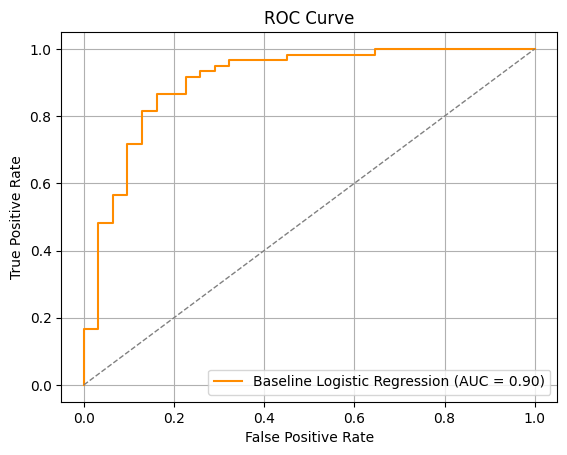

In [106]:
plot_roc_curve(y_test, y_test_pred_proba_base, label="Baseline Logistic Regression", color="darkorange")


In [107]:
def plot_confusion_matrix(y_true, y_pred, labels=[0, 1], normalize=None, title="Confusion Matrix", cmap="Blues"):
    """
    Plots a confusion matrix.
    
    Parameters:
    - y_true: True labels
    - y_pred: Predicted labels
    - labels: List of class labels (default [0, 1])
    - normalize: {‘true’, ‘pred’, ‘all’}, default=None. Normalizes confusion matrix over the true (rows), predicted (columns) conditions or all the population.
    - title: Plot title
    - cmap: Color map
    """
    cm = confusion_matrix(y_true, y_pred, labels=labels, normalize=normalize)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap=cmap, values_format=".2f" if normalize else "d")
    plt.title(title)
    plt.grid(False)
    plt.show()

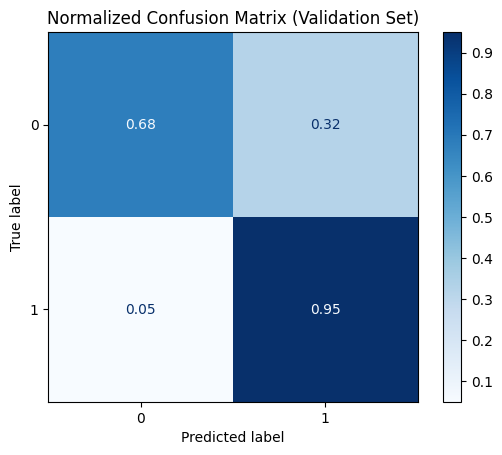

In [108]:
plot_confusion_matrix(y_test, y_test_pred_base, normalize="true", title="Normalized Confusion Matrix (Validation Set)", cmap="Blues")

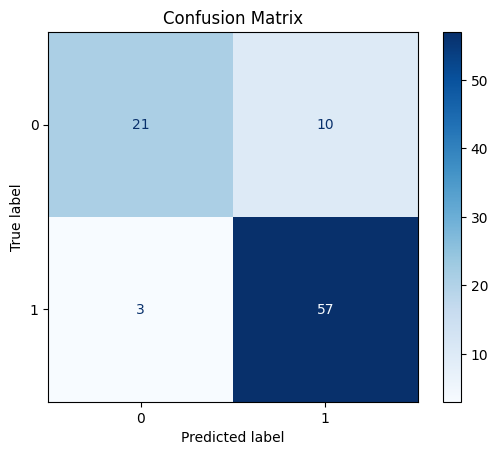

In [109]:
plot_confusion_matrix(y_test, y_test_pred_base,)

In [110]:
def print_classification_metrics(y_true, y_pred, y_proba=None, model_name="Model"):
    """
    Prints classification metrics for binary classification.
    
    Parameters:
    - y_true: Ground truth labels
    - y_pred: Predicted labels
    - y_proba: Predicted probabilities (optional, for ROC AUC)
    - model_name: Name of the model (for display)
    """
    print(f"\n📊 Classification Report for {model_name}:")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score:  {f1_score(y_true, y_pred):.4f}")
    if y_proba is not None:
        print(f"ROC AUC:   {roc_auc_score(y_true, y_proba):.4f}")


In [111]:
print_classification_metrics(y_test, y_test_pred_base, y_test_pred_proba_base, model_name="Baseline Logistic Regression")


📊 Classification Report for Baseline Logistic Regression:
Accuracy:  0.8571
Precision: 0.8507
Recall:    0.9500
F1 Score:  0.8976
ROC AUC:   0.9048


In [112]:
import shap

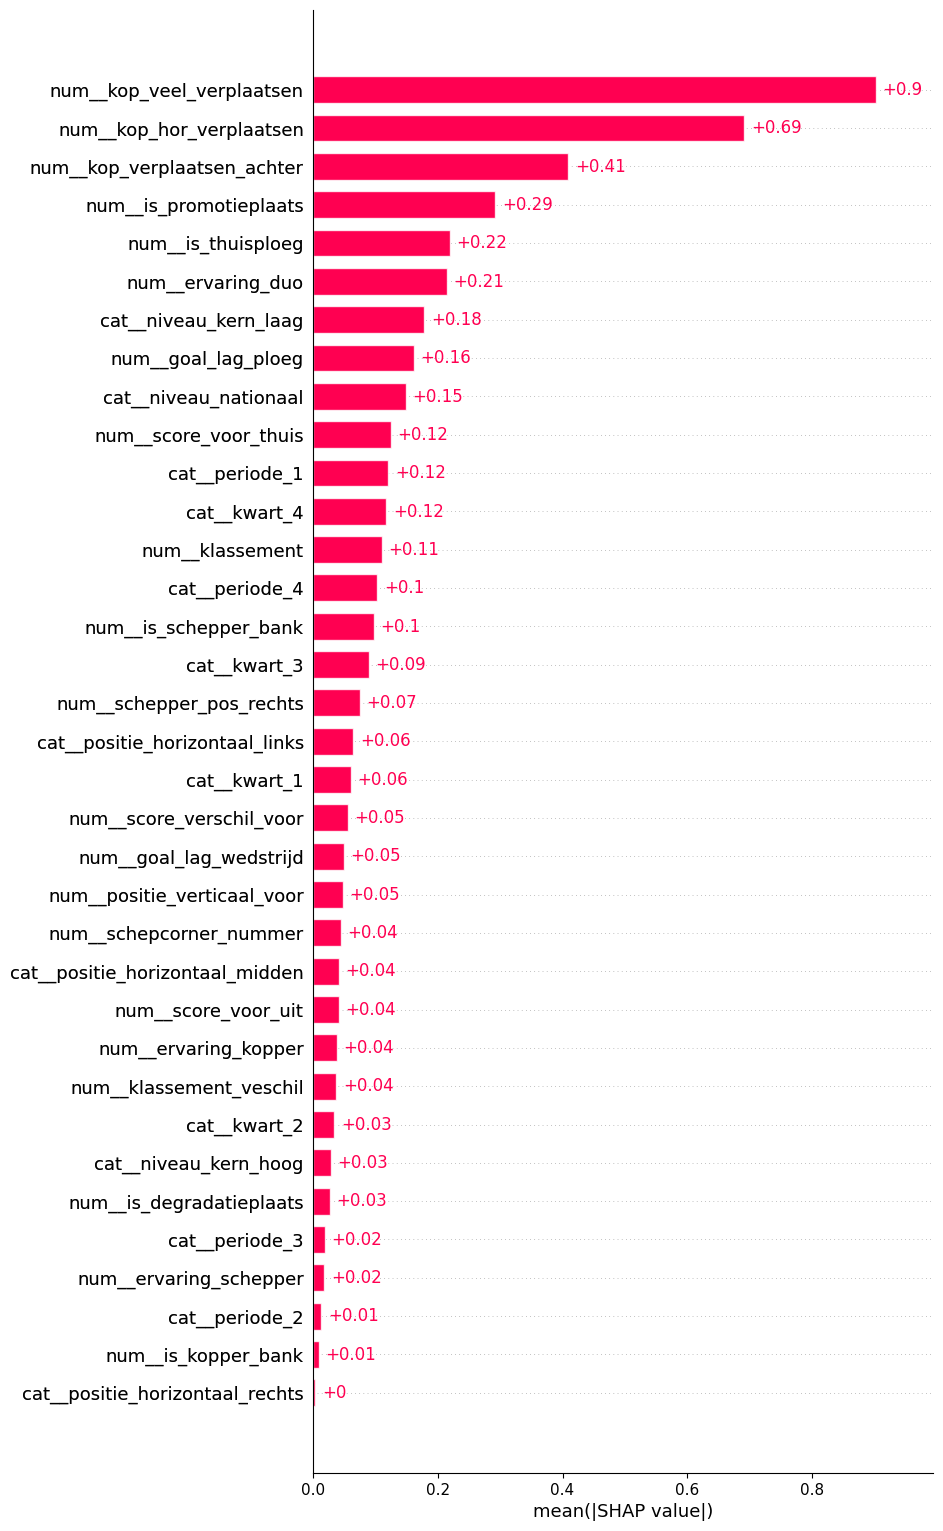

In [113]:
# Make sure you use the encoded feature names
X_test_df = pd.DataFrame(X_test_transformed, columns=encoded_feature_names)

# Create SHAP explainer for logistic regression
explainer_base = shap.Explainer(baseline_model, X_test_df)

# Compute SHAP values
shap_values = explainer_base(X_test_df)

# Plot global SHAP feature importance
shap.plots.bar(shap_values.abs.mean(0), max_display= len(encoded_feature_names))

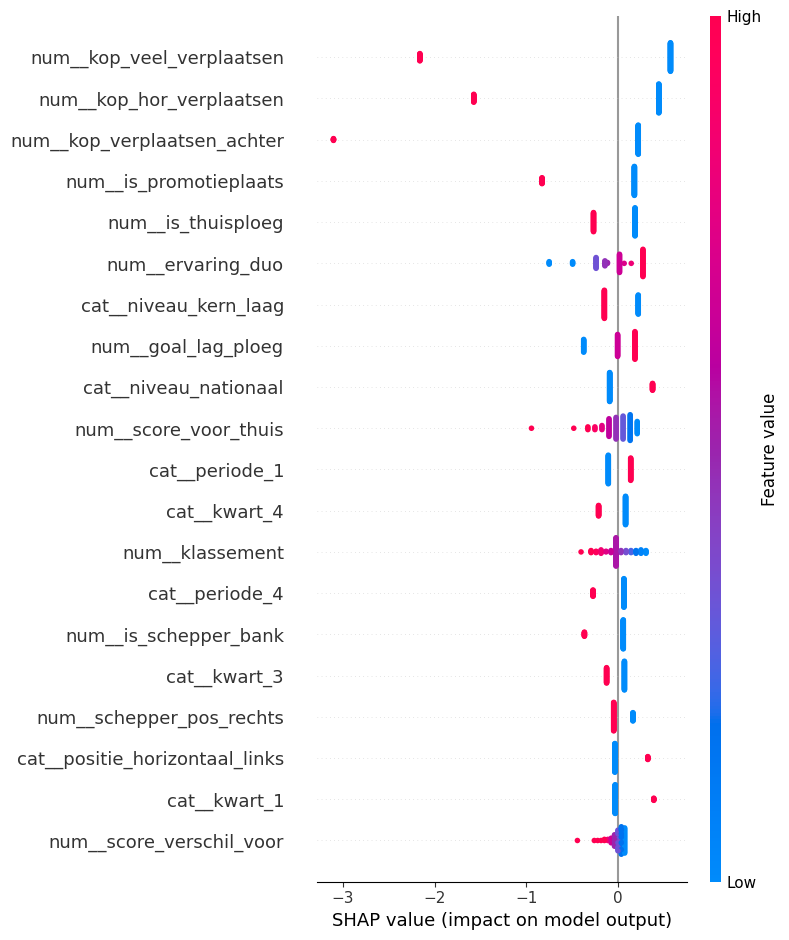

In [114]:
shap.summary_plot(shap_values, X_test_transformed)

### Random Forest

In [115]:
rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

X_test_transformed_rf = rf_pipeline.named_steps["preprocessor"].transform(X_test)

In [116]:
# Define hyperparameter grid
param_grid = {
    "classifier__n_estimators": [100, 200, 300],
    "classifier__max_depth": [None, 10, 20, 30],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4],
    "classifier__max_features": ["sqrt", "log2"]
}

random_search = RandomizedSearchCV(
    rf_pipeline,
    param_distributions=param_grid,
    n_iter=25,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search.fit(X_train_val, y_train_val)
best_rf_pipeline = random_search.best_estimator_
best_rf_model = best_rf_pipeline.named_steps["classifier"]

Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [117]:
# Predict probabilities and labels
y_rf_proba = best_rf_pipeline.predict_proba(X_test)[:, 1]
y_rf_preds = best_rf_pipeline.predict(X_test)

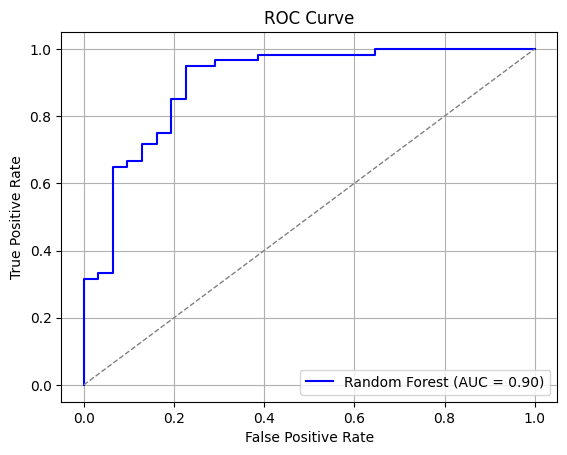

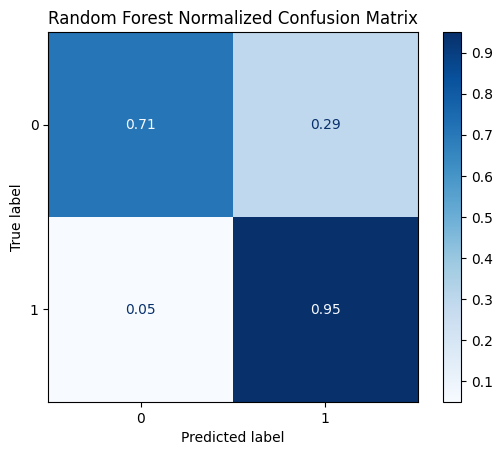

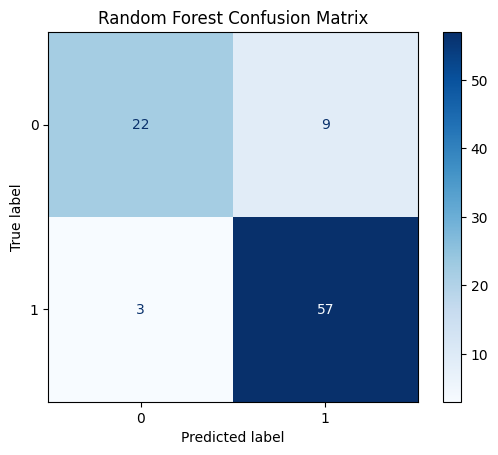


📊 Classification Report for Random Forest:
Accuracy:  0.8681
Precision: 0.8636
Recall:    0.9500
F1 Score:  0.9048
ROC AUC:   0.9016


In [118]:
# Evaluation
plot_roc_curve(y_test, y_rf_proba, label="Random Forest")
plot_confusion_matrix(y_test, y_rf_preds, normalize="true", title="Random Forest Normalized Confusion Matrix")
plot_confusion_matrix(y_test, y_rf_preds, title = "Random Forest Confusion Matrix")
print_classification_metrics(y_test, y_rf_preds, y_rf_proba, model_name="Random Forest")


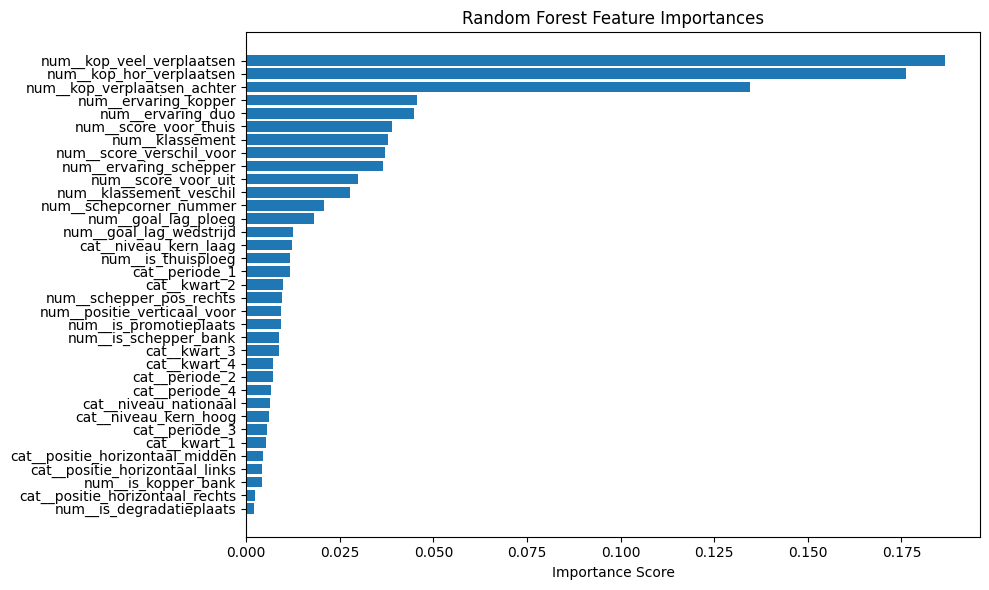

In [119]:
# Ensure your feature importances and names match in length
importances = best_rf_model.feature_importances_
feature_names = encoded_feature_names  # Make sure this matches the feature order in training

# Sort features by importance
indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_feature_names = [feature_names[i] for i in indices]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importances")
plt.barh(range(len(sorted_importances)), sorted_importances[::-1], align="center")
plt.yticks(range(len(sorted_importances)), sorted_feature_names[::-1])
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

In [120]:
type(best_rf_model)

sklearn.ensemble._forest.RandomForestClassifier

In [121]:
best_rf_model

RandomForestClassifier(max_depth=30, min_samples_leaf=2, n_estimators=200,
                       random_state=42)

In [122]:
# # Make sure you use the encoded feature names
# X_test_rf_df = pd.DataFrame(X_test_transformed_rf, columns=encoded_feature_names)

# # Create SHAP explainer for logistic regression
# explainer_rf = shap.TreeExplainer(best_rf_model, X_test_rf_df)

# # Compute SHAP values
# shap_values_rf = explainer_rf(X_test_rf_df)

# # Plot global SHAP feature importance
# shap.plots.bar(shap_values_rf.abs.mean(0), max_display= len(encoded_feature_names))

In [123]:
# shap.summary_plot(shap_values_rf, X_test_transformed_rf)

In [124]:
# dependence plot, inspect impact of a single feature on the model output
# shap.plots.scatter(shap_values_rf[:, "num__score_voor_thuis"], color=shap_values_rf)

In [125]:
X_test_transformed_rf

array([[0.  , 1.  , 0.75, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.75, ..., 1.  , 0.  , 0.  ],
       [0.5 , 1.  , 0.5 , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.75, 0.75, 0.75, ..., 0.  , 0.  , 0.  ],
       [0.75, 0.75, 0.75, ..., 0.  , 0.  , 0.  ],
       [1.  , 1.  , 1.  , ..., 0.  , 0.  , 1.  ]])

In [126]:
from sklearn.inspection import permutation_importance

<BarContainer object of 35 artists>

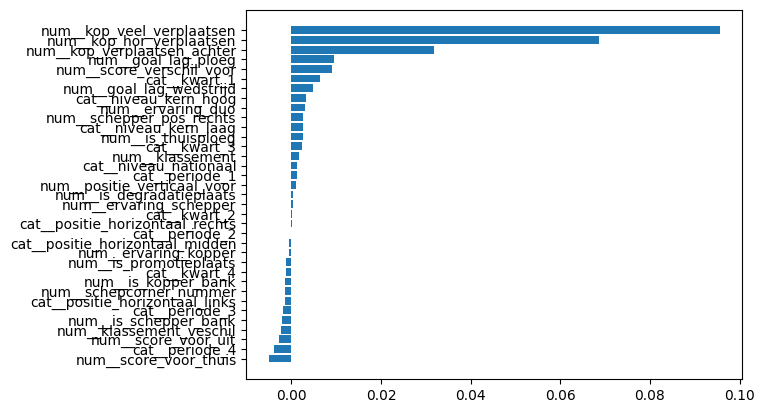

In [127]:
X_test_rf_df = pd.DataFrame(X_test_transformed_rf, columns=encoded_feature_names)

perm_importance = permutation_importance(best_rf_model, X_test_transformed_rf, y_test, scoring = 'roc_auc', n_repeats=20)
sorted_idx2 = perm_importance.importances_mean.argsort()
plt.barh(X_test_rf_df.columns[sorted_idx2], perm_importance.importances_mean[sorted_idx2])

### Xgboost

In [128]:
from xgboost import XGBClassifier

In [129]:
xgb_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42))
])

X_test_transformed_xgb = xgb_pipeline.named_steps["preprocessor"].transform(X_test)

In [130]:
# Hyperparameter grid
param_grid_xgb = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [3, 6, 10],
    "classifier__learning_rate": [0.01, 0.1, 0.2],
    "classifier__subsample": [0.8, 1],
    "classifier__colsample_bytree": [0.8, 1]
}

random_search_xgb = RandomizedSearchCV(
    xgb_pipeline,
    param_distributions=param_grid_xgb,
    n_iter=25,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search_xgb.fit(X_train_val, y_train_val)
best_xgb_pipeline = random_search_xgb.best_estimator_
best_xgb_model = best_xgb_pipeline.named_steps["classifier"]

Fitting 5 folds for each of 25 candidates, totalling 125 fits


c:\Users\cosyn\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:05:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [131]:
# Predict probabilities and labels
y_xgb_proba = best_xgb_pipeline.predict_proba(X_test)[:, 1]
y_xgb_preds = best_xgb_pipeline.predict(X_test)

In [132]:
y_xgb_proba

array([0.5264468 , 0.5906775 , 0.125374  , 0.8690877 , 0.14689277,
       0.81278276, 0.6993694 , 0.9181667 , 0.29010576, 0.82754326,
       0.41600418, 0.12919353, 0.91309667, 0.2992229 , 0.12451906,
       0.86594987, 0.93095183, 0.7372529 , 0.22674654, 0.733474  ,
       0.3662635 , 0.45187134, 0.9307067 , 0.87993133, 0.90883845,
       0.8903858 , 0.8299657 , 0.9251283 , 0.14849804, 0.8274076 ,
       0.9189599 , 0.758119  , 0.74924546, 0.9125809 , 0.80458945,
       0.9293571 , 0.936756  , 0.12546968, 0.2630297 , 0.91804755,
       0.92295057, 0.8983555 , 0.21417317, 0.6335752 , 0.8851598 ,
       0.9223731 , 0.9090521 , 0.9335087 , 0.5625475 , 0.90027386,
       0.7932715 , 0.19435072, 0.9219141 , 0.8608417 , 0.85512304,
       0.9341734 , 0.9099901 , 0.4448561 , 0.91369575, 0.9165578 ,
       0.19890037, 0.9362563 , 0.76771164, 0.92515236, 0.81498873,
       0.9062831 , 0.6119231 , 0.90568584, 0.92158425, 0.9356319 ,
       0.16486757, 0.90708524, 0.14550246, 0.76082927, 0.91512

In [133]:
y_xgb_proba == y_rf_proba

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

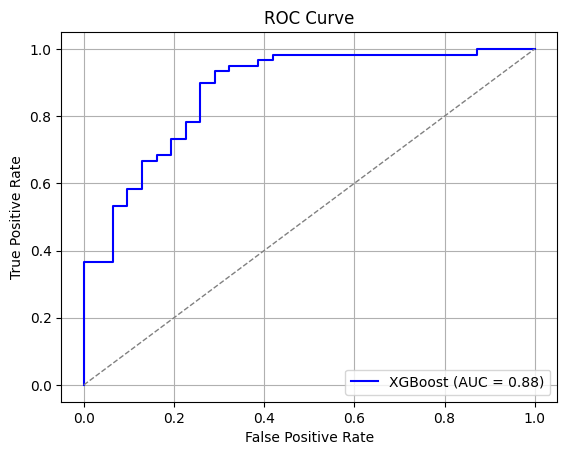

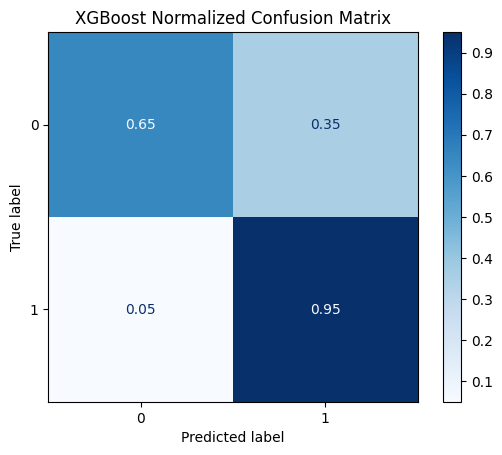

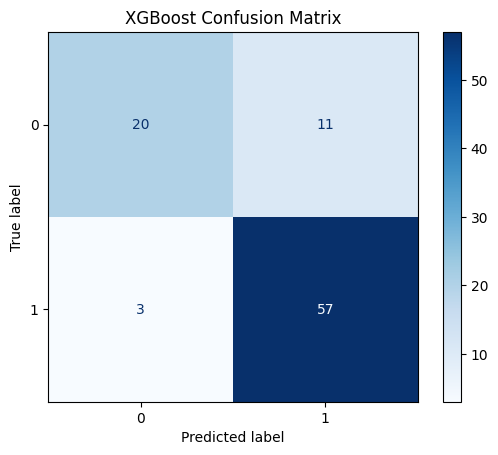


📊 Classification Report for XGBoost:
Accuracy:  0.8462
Precision: 0.8382
Recall:    0.9500
F1 Score:  0.8906
ROC AUC:   0.8769


In [134]:
# Evaluation
plot_roc_curve(y_test, y_xgb_proba, label="XGBoost")
plot_confusion_matrix(y_test, y_xgb_preds, normalize="true", title="XGBoost Normalized Confusion Matrix")
plot_confusion_matrix(y_test, y_xgb_preds, title = "XGBoost Confusion Matrix")
print_classification_metrics(y_test, y_xgb_preds, y_xgb_proba, model_name="XGBoost")


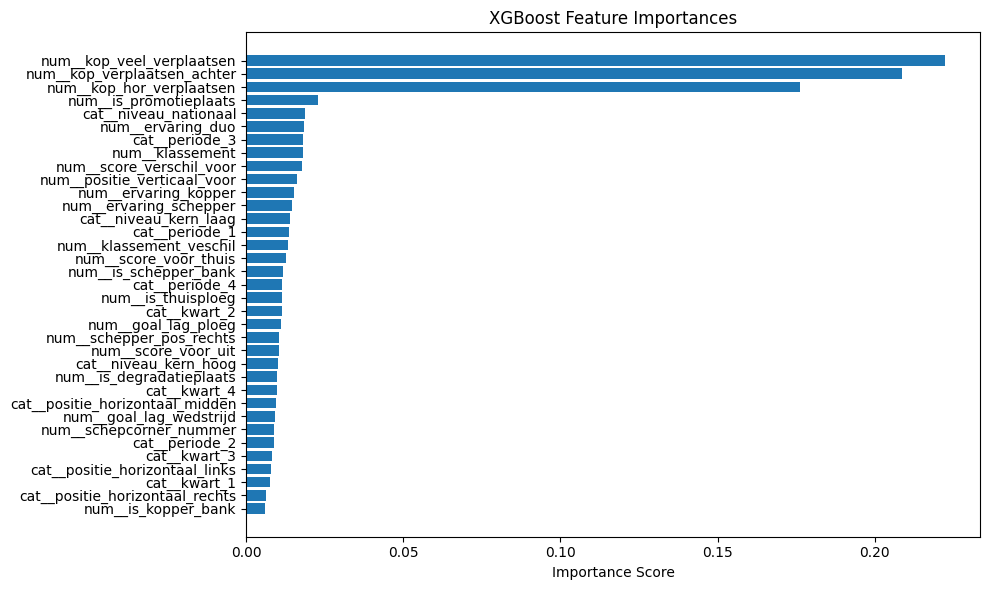

In [135]:
# Ensure your feature importances and names match in length
importances_xgb = best_xgb_model.feature_importances_
feature_names = encoded_feature_names  # Make sure this matches the feature order in training

# Sort features by importance
indices = np.argsort(importances_xgb)[::-1]
sorted_importances = importances_xgb[indices]
sorted_feature_names = [feature_names[i] for i in indices]

# Plot
plt.figure(figsize=(10, 6))
plt.title("XGBoost Feature Importances")
plt.barh(range(len(sorted_importances)), sorted_importances[::-1], align="center")
plt.yticks(range(len(sorted_importances)), sorted_feature_names[::-1])
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

<BarContainer object of 35 artists>

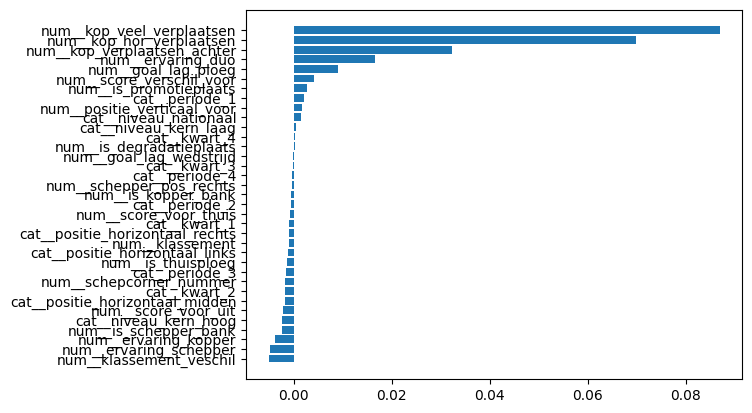

In [136]:
X_test_xgb_df = pd.DataFrame(X_test_transformed_xgb, columns=encoded_feature_names)
perm_importance_xgb = permutation_importance(best_xgb_model, X_test_transformed_xgb, y_test, scoring = 'roc_auc', n_repeats=20)
sorted_idx_xgb = perm_importance_xgb.importances_mean.argsort()
plt.barh(X_test_xgb_df.columns[sorted_idx_xgb], perm_importance_xgb.importances_mean[sorted_idx_xgb])

xgb_proba

In [137]:
y_xgb_proba[1:]

array([0.5906775 , 0.125374  , 0.8690877 , 0.14689277, 0.81278276,
       0.6993694 , 0.9181667 , 0.29010576, 0.82754326, 0.41600418,
       0.12919353, 0.91309667, 0.2992229 , 0.12451906, 0.86594987,
       0.93095183, 0.7372529 , 0.22674654, 0.733474  , 0.3662635 ,
       0.45187134, 0.9307067 , 0.87993133, 0.90883845, 0.8903858 ,
       0.8299657 , 0.9251283 , 0.14849804, 0.8274076 , 0.9189599 ,
       0.758119  , 0.74924546, 0.9125809 , 0.80458945, 0.9293571 ,
       0.936756  , 0.12546968, 0.2630297 , 0.91804755, 0.92295057,
       0.8983555 , 0.21417317, 0.6335752 , 0.8851598 , 0.9223731 ,
       0.9090521 , 0.9335087 , 0.5625475 , 0.90027386, 0.7932715 ,
       0.19435072, 0.9219141 , 0.8608417 , 0.85512304, 0.9341734 ,
       0.9099901 , 0.4448561 , 0.91369575, 0.9165578 , 0.19890037,
       0.9362563 , 0.76771164, 0.92515236, 0.81498873, 0.9062831 ,
       0.6119231 , 0.90568584, 0.92158425, 0.9356319 , 0.16486757,
       0.90708524, 0.14550246, 0.76082927, 0.9151201 , 0.73609

In [138]:
def plot_multiple_roc_curves_from_scores(score_dict: dict, y_true, title="ROC Curves"):
    """
    Plot ROC curves from predicted probability scores (not models).

    Parameters:
    - score_dict: dict, keys are model names, values are predicted probabilities for the positive class
    - y_true: true labels
    - title: optional plot title
    """
    plt.figure(figsize=(8, 6))

    for name, y_scores in score_dict.items():
        fpr, tpr, _ = roc_curve(y_true, y_scores)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], "k--", label="Random")

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


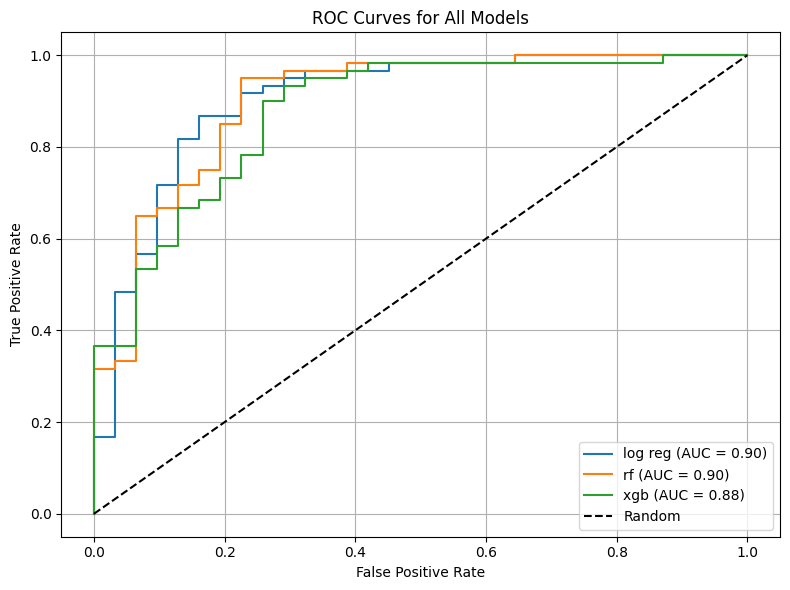

In [139]:
plot_multiple_roc_curves_from_scores({"log reg": y_test_pred_proba_base, "rf": y_rf_proba, "xgb": y_xgb_proba}, y_test, title="ROC Curves for All Models")

### Model zonder schepkwaliteit indicatoren

In [143]:
### 
X_zonder = X_train_val.drop(columns=["kop_hor_verplaatsen", "kop_veel_verplaatsen", "kop_verplaatsen_achter"])
X_test_zonder = X_test.drop(columns=["kop_hor_verplaatsen", "kop_veel_verplaatsen", "kop_verplaatsen_achter"])
to_remove = ["kop_hor_verplaatsen", "kop_veel_verplaatsen", "kop_verplaatsen_achter"]
num_cols_zonder = [col for col in num_cols if col not in to_remove]


In [144]:
# Define transformers
numeric_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# Combine into column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

In [145]:
# Separate features and target
X = basetable[num_cols_zonder + cat_cols]
y = basetable["goal"]

# Apply the preprocessing
X_transformed_zonder = preprocessor.fit_transform(X)

# get feature names after transformation
encoded_feature_names_zonder = preprocessor.get_feature_names_out()

In [146]:
zonder_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

X_test_transformed_zonder = zonder_pipeline.named_steps["preprocessor"].transform(X_test)

In [147]:
# Define hyperparameter grid
param_grid = {
    "classifier__n_estimators": [100, 200, 300],
    "classifier__max_depth": [None, 10, 20, 30],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4],
    "classifier__max_features": ["sqrt", "log2"]
}

random_search = RandomizedSearchCV(
    zonder_pipeline,
    param_distributions=param_grid,
    n_iter=25,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search.fit(X_zonder, y_train_val)
best_zonder_pipeline = random_search.best_estimator_
best_zonder_model = best_zonder_pipeline.named_steps["classifier"]

Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [148]:
# Predict probabilities and labels
y_zonder_proba = best_zonder_pipeline.predict_proba(X_test_zonder)[:, 1]
y_zonder_preds = best_zonder_pipeline.predict(X_test_zonder)

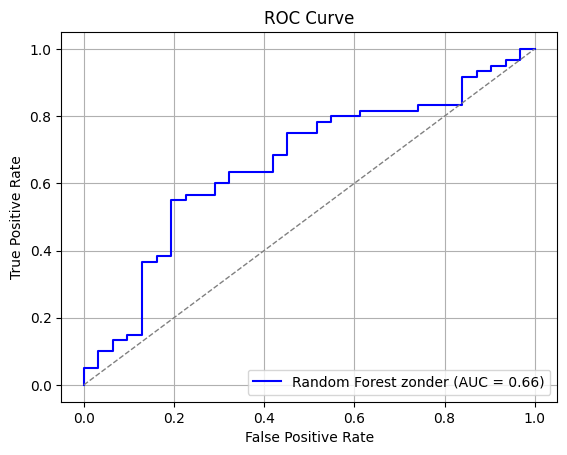

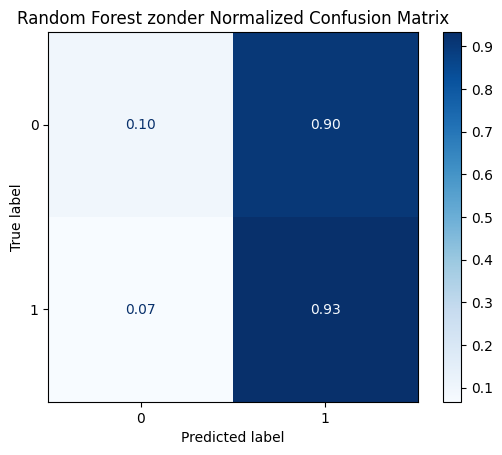

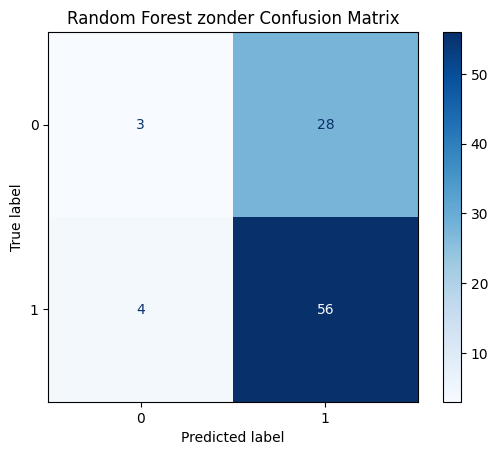


📊 Classification Report for Random Forest zonder:
Accuracy:  0.6484
Precision: 0.6667
Recall:    0.9333
F1 Score:  0.7778
ROC AUC:   0.6602


In [149]:
# Evaluation
plot_roc_curve(y_test, y_zonder_proba, label="Random Forest zonder")
plot_confusion_matrix(y_test, y_zonder_preds, normalize="true", title="Random Forest zonder Normalized Confusion Matrix")
plot_confusion_matrix(y_test, y_zonder_preds, title = "Random Forest zonder Confusion Matrix")
print_classification_metrics(y_test, y_zonder_preds, y_zonder_proba, model_name="Random Forest zonder")


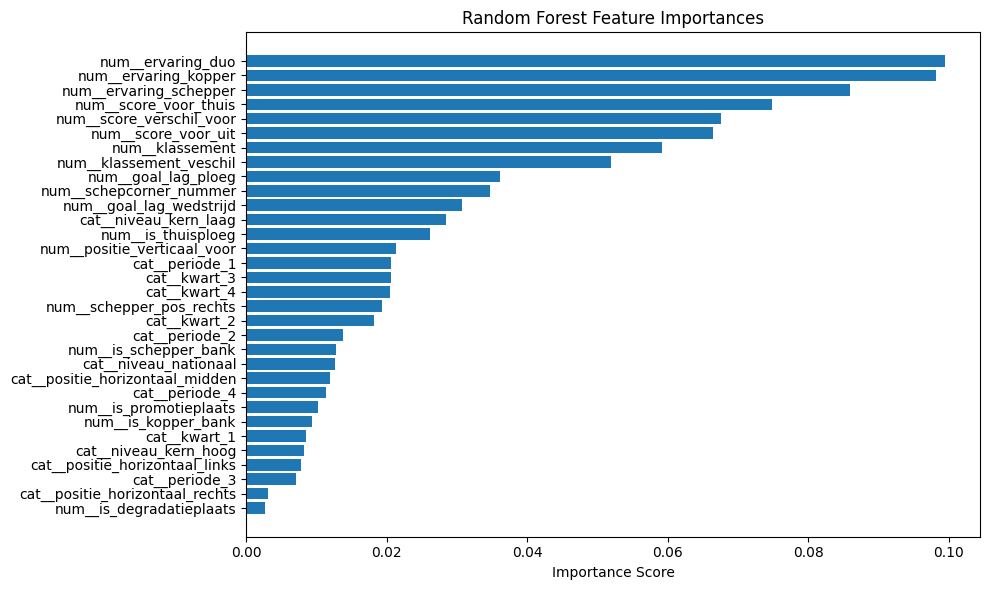

In [150]:
importances = best_zonder_model.feature_importances_
feature_names = encoded_feature_names_zonder  # Make sure this matches the feature order in training

# Sort features by importance
indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_feature_names = [feature_names[i] for i in indices]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importances")
plt.barh(range(len(sorted_importances)), sorted_importances[::-1], align="center")
plt.yticks(range(len(sorted_importances)), sorted_feature_names[::-1])
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

<BarContainer object of 32 artists>

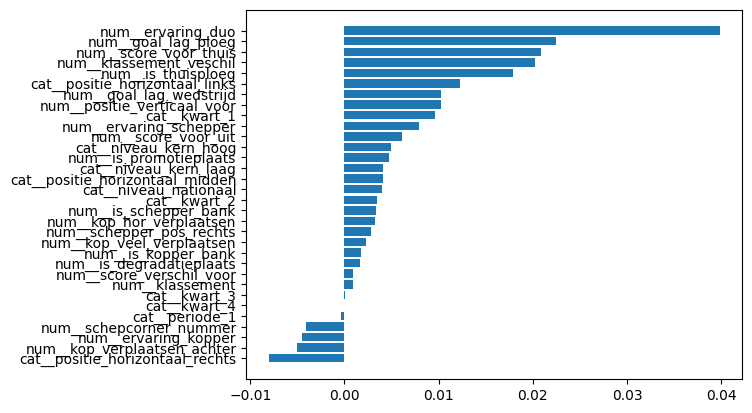

In [151]:
perm_importance_zonder = permutation_importance(best_zonder_model, X_test_transformed_zonder, y_test, scoring = 'roc_auc', n_repeats=20)
sorted_idx2 = perm_importance_zonder.importances_mean.argsort()
plt.barh(X_test_rf_df.columns[sorted_idx2], perm_importance_zonder.importances_mean[sorted_idx2])

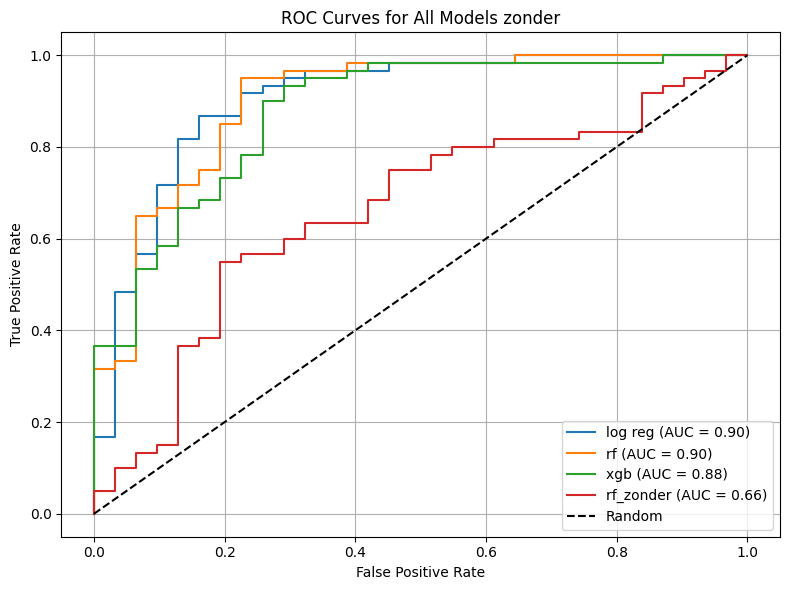

In [152]:
# plot all the roc curves
plot_multiple_roc_curves_from_scores({"log reg": y_test_pred_proba_base, "rf": y_rf_proba, "xgb": y_xgb_proba, "rf_zonder": y_zonder_proba}, y_test, title="ROC Curves for All Models zonder")